<a href="https://colab.research.google.com/github/rcpsilva/BCC325_2021_1/blob/main/BCC325_PyTorchFashionMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

In [2]:
# Transform image to tensor
transform = transforms.Compose([transforms.ToTensor()])

# Get training set
trainset = torchvision.datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)

# Get test set
testset = torchvision.datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)

# Create Loaders
batch_size = 16

trainloader = torch.utils.data.DataLoader(trainset,shuffle=True, batch_size=batch_size)
testloader = torch.utils.data.DataLoader(testset,shuffle=True, batch_size=batch_size)

classes = ('T-Shirt','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot')

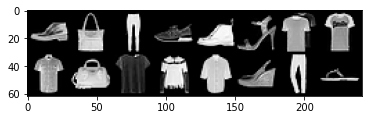

Ankle Boot, Bag, Trouser, Sneaker, Ankle Boot, Sandal, T-Shirt, T-Shirt, Shirt, Bag, Shirt, Shirt, Shirt, Sandal, Trouser, Sandal


In [3]:
import matplotlib.pyplot as plt
import numpy as np

def imgshow(img):
  npimg = img.numpy()
  plt.imshow(np.transpose(npimg,(1,2,0)))
  plt.show()

# Get a batch of images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# Show images
imgshow(torchvision.utils.make_grid(images))

# print labels
print(', '.join('%s' % classes[labels[j]] for j in range(batch_size)))

In [4]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):

  def __init__(self):
    super(Net,self).__init__()
    self.fc1 = nn.Linear(28*28,16) 
    self.fc2 = nn.Linear(16,16)
    self.fc3 = nn.Linear(16,16)
    self.fc4 = nn.Linear(16,10) 

  def forward(self, x):
    x = x.view(-1,28*28)
    #x = torch.sigmoid(self.fc1(x))
    #x = torch.sigmoid(self.fc2(x))
    #x = torch.sigmoid(self.fc3(x))
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = F.relu(self.fc3(x))
    x = self.fc4(x)
    return x

In [5]:
net = Net()

In [6]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.01)

In [7]:
nepochs = 10

for epoch in range(nepochs):
  running_loss = 0.0

  for i, data in enumerate(trainloader,0):
    inputs, labels = data

    optimizer.zero_grad()

    outputs = net(inputs)
    loss = criterion(outputs,labels)
    loss.backward()
    optimizer.step() 

    running_loss += loss.item()
    n_batch = 1000
    if i % n_batch == (n_batch-1):
        print('[%d, %i] loss: %.3f' % (epoch+1, i+1, running_loss/n_batch))
        running_loss = 0.0

print('Finished Training')

[1, 1000] loss: 2.003
[1, 2000] loss: 1.001
[1, 3000] loss: 0.789
[2, 1000] loss: 0.637
[2, 2000] loss: 0.595
[2, 3000] loss: 0.554
[3, 1000] loss: 0.531
[3, 2000] loss: 0.505
[3, 3000] loss: 0.497
[4, 1000] loss: 0.488
[4, 2000] loss: 0.474
[4, 3000] loss: 0.457
[5, 1000] loss: 0.449
[5, 2000] loss: 0.447
[5, 3000] loss: 0.431
[6, 1000] loss: 0.412
[6, 2000] loss: 0.424
[6, 3000] loss: 0.422
[7, 1000] loss: 0.408
[7, 2000] loss: 0.408
[7, 3000] loss: 0.403
[8, 1000] loss: 0.400
[8, 2000] loss: 0.388
[8, 3000] loss: 0.386
[9, 1000] loss: 0.383
[9, 2000] loss: 0.382
[9, 3000] loss: 0.380
[10, 1000] loss: 0.387
[10, 2000] loss: 0.379
[10, 3000] loss: 0.374
Finished Training


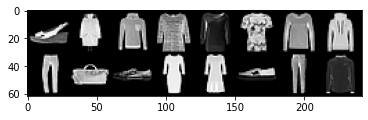

(Sandal : Sandal), (Coat : Coat), (Pullover : Pullover), (T-Shirt : Shirt), (T-Shirt : Pullover), (T-Shirt : T-Shirt), (Pullover : Pullover), (Pullover : Pullover), (Trouser : Trouser), (Bag : Bag), (Sneaker : Sneaker), (Dress : Dress), (Dress : Dress), (Sneaker : Sneaker), (Trouser : Trouser), (Coat : Pullover)


In [11]:
dataiter = iter(testloader)
images, labels = dataiter.next()

imgshow(torchvision.utils.make_grid(images))

output = net(images)
_, predicted = torch.max(output,1)

print(', '.join('(%s : %s)' % (classes[labels[j]],classes[predicted[j]]) for j in range(batch_size)))

In [9]:
correct = 0
total = 0

with torch.no_grad():
  for data in testloader:
    images, labels = data
    outputs = net(images)
    _, predicted = torch.max(outputs,1)
    total += labels.size(0)
    correct += (predicted==labels).sum().item()

print('Accuracy: %.2f %%' % (correct/total*100))

Accuracy: 85.77 %


In [10]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of T-Shirt : 81 %
Accuracy of Trouser : 96 %
Accuracy of Pullover : 80 %
Accuracy of Dress : 91 %
Accuracy of  Coat : 76 %
Accuracy of Sandal : 95 %
Accuracy of Shirt : 59 %
Accuracy of Sneaker : 95 %
Accuracy of   Bag : 94 %
Accuracy of Ankle Boot : 92 %
